## Analyze learning

### Pendulum v0

* Observations : cos(theta)(-1, 1), sin(theta)(-1, 1), theta dot(-8,8)
* Action : torque(-2, 2) 

In [48]:
# load actor model
import gym
import torch
import numpy as np
import math

from model import Actor
from easydict import EasyDict as edict

args = edict({'hidden_size':64})
env=gym.make('Pendulum-v0')
env.seed(10)
torch.manual_seed(10)

state_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]

actor = Actor(state_size, action_size, args).float()
actor.load_state_dict(torch.load("./save_model/model.pth.tar"))

/home/donghyun/anaconda2/envs/gym_torch/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [106]:
import pandas as pd
df = pd.DataFrame([[0,0,0]],columns=["theta","theta_dot","actor"])
num_data = 40000

for i in range(num_data):
    theta_cs = np.random.rand(1,2)*2-1
    
    theta = math.atan2(theta_cs[0,1],theta_cs[0,0])
    theta_dot = np.random.rand(1,1)*16-8
   
    sample = np.hstack((theta_cs,theta_dot))
    
    output, std = actor(torch.from_numpy(sample).float())
    output = output.item()
    theta_dot = theta_dot[0,0]
    tmp = pd.DataFrame([[theta,theta_dot,output]],columns=["theta","theta_dot","actor"])
    df = df.append(tmp)

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

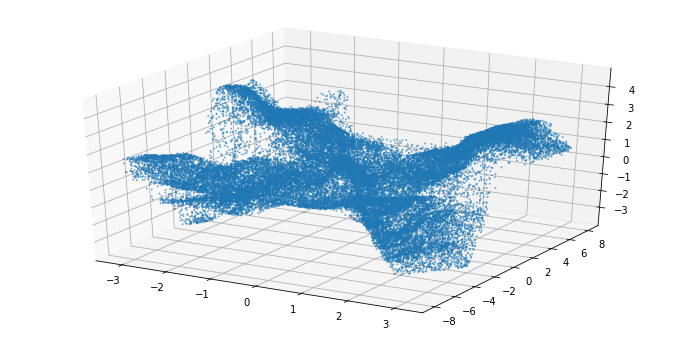

In [110]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
#ax.contour3D(df["theta"], df["theta_dot"], df["actor"], 20, cmap=plt.cm.rainbow)
ax.scatter(df["theta"], df["theta_dot"], df["actor"], s= 1, alpha=0.5, cmap=plt.cm.Greens)

In [ ]:
ax.scatter()